In [8]:
import stk
from rdkit.Chem import AllChem as rdkit
import sys
import os
from rdkit.Chem import RDConfig
from rdkit.Chem.Draw import IPythonConsole
sys.path.append(RDConfig.RDContribDir)

In [29]:
rdkit.CalcNumRotatableBonds(m, strict=True)

0

In [4]:
pop = stk.Population.load('example_population/generations/generation_1.json')

In [30]:
m = pop[1].to_rdkit_mol()

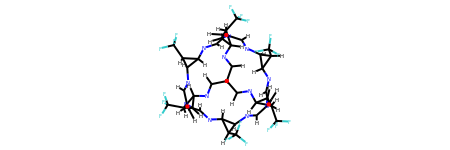

In [24]:
rdkit.AddHs(m)

In [26]:
rdkit.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

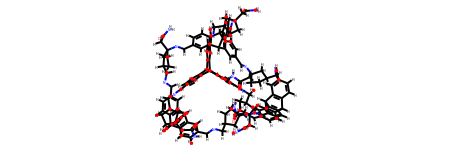

In [31]:
m

In [ ]:

from rdkit import Chem
from rdkit .Chem import AllChem
from collections import OrderedDict import numpy as np
def GenerateConformers(mol, numConfs):
#Add H atoms to skeleton
    molecule = Chem.AddHs(mol)
conformerIntegers = []
#Embed and optimise the conformers
conformers = AllChem . EmbedMultipleConfs ( molecule , 􏰀→ pruneRmsThresh =0.5 , numThreads =3)
numConfs ,
Python Implementation
Listing 1 Script calculating nConf20 for an example molecule. The code runs in Python 2.7 and uses the following
optimised and energies =
􏰀→ AllChem.MMFFOptimizeMoleculeConfs(molecule , maxIters=600, 􏰀→ numThreads =3 , nonBondedThresh =100.0)
EnergyDictionaryWithIDAsKey = {} FinalConformersToUse = {}
#Only keep the conformers which were successfully fully optimised
S2
 21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
for
conformer in conformers :
optimised , energy = optimised and energies[conformer] if optimised == 0:
EnergyDictionaryWithIDAsKey [ conformer ] = energy conformerIntegers.append(conformer)
#Keep the lowest energy conformer
lowestenergy = min( EnergyDictionaryWithIDAsKey . values () )
for k, v in EnergyDictionaryWithIDAsKey.iteritems(): if v == lowestenergy:
lowestEnergyConformerID = k
FinalConformersToUse [ lowestEnergyConformerID ] = lowestenergy
#Remove H atoms to speed up substructure matching
molecule = AllChem.RemoveHs(molecule)
#Find all substructure matches of the molecule with itself , to 􏰀→ account for symmetry
matches = molecule . GetSubstructMatches ( molecule , uniquify=False ) maps = [ list (enumerate(match)) for match in matches]
#Loop over conformers other than the lowest energy one
for conformerID in EnergyDictionaryWithIDAsKey . keys () :
S3

 46
47
48
49
50
51
52
53
54
55
56
57
58
59
60 61
62 63 64
65
okayToAdd = True
#Loop over reference conformers already added to l i s t
for
finalconformerID in FinalConformersToUse . keys () :
#Calculate the best RMS of this conformer with the 􏰀→ reference conformer in the l i s t
RMS = AllChem . GetBestRMS ( molecule ,
􏰀→ molecule , finalconformerID , conformerID , maps)
#Do not add if a match is found with a reference conformer
if RMS< 1.0: okayToAdd = False break
#Add the conformer if the RMS is greater than 1.0 for every 􏰀→ reference conformer
i f okayToAdd :
FinalConformersToUse [ conformerID ] =
􏰀→ EnergyDictionaryWithIDAsKey [ conformerID ]
#Sort the conformers by energy
sortedDictionary =
􏰀→ OrderedDict ( sorted ( FinalConformersToUse . iteritems () , 􏰀→ key=lambda t: t[1]))
S4

 66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
energies = [val for val in sortedDictionary.itervalues()]
return energies
def Calc nConf20(energylist): energy descriptor = 0
relativeenergies = np.array(energylist) − energylist[0]
#Only look at the energies of conformers other than the global 􏰀→ minimum
for energy in relativeenergies [1:]:
#Optimized lower and upper energy limits for conformer energy
if 0 <= energy < 20: energy descriptor += 1
return energy descriptor